# Tugas Besar 1 Probabilitas dan Statistika
```
Oleh :
- 13517007 : Mohammmad Ridwan Hady Arifin
- 13517099 : Asif Hummam Rais
```
### Daftar Isi

1. [Daftar Dependencies](#1.-Daftar-Dependencies)
2. [Dataset 1 : Fifa](#2.-Dataset-1-:-Fifa)
    1. [Baca Berkas](#2.1-Baca-Berkas)
    2. [Visualisasi Data](#2.2-Visualisasi-Data)
    3. [Deskripsi Statistik Data](#2.3-Deskripsi-Statistik-Data)
    4. [Menentukan Fungsi Densitas Probabilitas](#2.4-Menentukan-Fungsi-Densitas-Probabilitas)
    5. [Pertanyaan](#2.5-Pertanyaan)
    6. [Jawaban](#2.6-Jawaban)
3. [Dataset 3 : Black Friday]()
    1. [Baca Berkas](#3.1-Baca-Berkas)
    2. [Visualisasi Data](#3.2-Visualisasi-Data)
    3. [Deskripsi Statistik Data](#3.3-Deskripsi-Statistik-Data)
    4. [Menentukan Fungsi Densitas Probabilitas](#3.4-Menentukan-Fungsi-Densitas-Probabilitas)
    5. [Pertanyaan](#3.5-Pertanyaan)
    6. [Jawaban](#3.6-Jawaban)
4. [Dataset 4 : Cryptocurrency](#4.-Dataset-4-:-Cryptocurrency)
    1. [Baca Berkas](#4.1-Baca-Berkas)
    2. [Visualisasi Data](#4.2-Visualisasi-Data)
    3. [Deskripsi Statistik Data](#4.3-Deskripsi-Statistik-Data)
    4. [Menentukan Fungsi Densitas Probabilitas](#4.4-Menentukan-Fungsi-Densitas-Probabilitas)
    5. [Pertanyaan](#4.5-Pertanyaan)
    6. [Jawaban](#4.6-Jawaban)
5. [Dataset 6 : Dutch Emission](#5.-Dataset-6-:-Dutch-Emission)
    1. [Baca Berkas](#5.1-Baca-Berkas)
    2. [Visualisasi Data](#5.2-Visualisasi-Data)
    3. [Deskripsi Statistik Data](#5.3-Deskripsi-Statistik-Data)
    4. [Menentukan Fungsi Densitas Probabilitas](#5.4-Menentukan-Fungsi-Densitas-Probabilitas)
    5. [Pertanyaan](#5.5-Pertanyaan)
    6. [Jawaban](#5.6-Jawaban)
6. [Dataset 5 : Atlet Olimpiade](#6.-Dataset-5-:-Atlet-Olimpiade)
    1. [Baca Berkas](#6.1-Baca-Berkas)
    2. [Visualisasi Data](#6.2-Visualisasi-Data)
    3. [Deskripsi Statistik Data](#6.3-Deskripsi-Statistik-Data)
    4. [Menentukan Fungsi Densitas Probabilitas](#6.4-Menentukan-Fungsi-Densitas-Probabilitas)
    5. [Pertanyaan](#6.5-Pertanyaan)
    6. [Jawaban](#6.6-Jawaban)

## 1. Daftar Dependencies

In [1]:
from scipy import stats

import pandas as pd
import numpy as np               
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

Dokumentasi
1. [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
2. [Numpy and Scipy](https://docs.scipy.org/doc/)
3. [Matplotlib.pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
4. [Seaborn](https://seaborn.pydata.org/)
5. [Math](https://docs.python.org/3/library/math.html)

## 2. Dataset 1 : Fifa
### 2.1 Baca Berkas

In [2]:
fifa = pd.read_csv("fifa.csv")
fifa.head()

Name  Age Nationality
0           L. Messi   31   Argentina
1  Cristiano Ronaldo   33    Portugal
2          Neymar Jr   26      Brazil
3             De Gea   27       Spain
4       K. De Bruyne   27     Belgium

### 2.2 Visualisasi Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B1056F6D8>]],
      dtype=object)

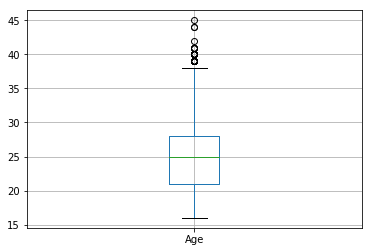

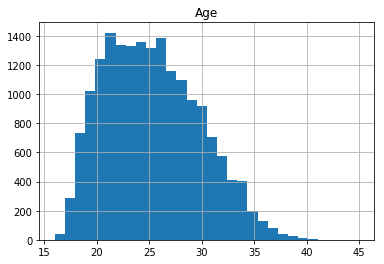

In [3]:
fifa.boxplot()
fifa.hist(bins=(fifa['Age'].max() - fifa['Age'].min() + 1))

### 2.3 Deskripsi Statistik Data

In [4]:
print("Minimum Value      :", fifa['Age'].min())
print("Maximum Value      :", fifa['Age'].max())
print("Mean               :", fifa['Age'].mean())
print("Mode               :", fifa['Age'].mode()[0])
print("Variance           :", fifa['Age'].var())
print("Standard Deviation :", fifa['Age'].std())
print("Skewness           :", fifa['Age'].skew())
print("Kurtosis           :", fifa['Age'].kurt())

Minimum Value      : 16
Maximum Value      : 45
Mean               : 25.122205745043114
Mode               : 21
Variance           : 21.808364946571594
Standard Deviation : 4.66994271341433
Skewness           : 0.3917641387687474
Kurtosis           : -0.4595135539307731


### 2.4 Menentukan Fungsi Densitas Probabilitas

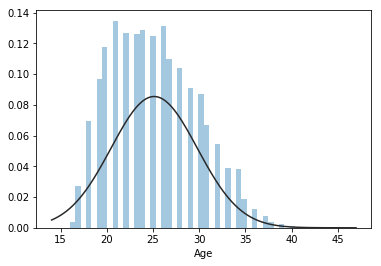

In [5]:
# Bandingkan dengan kurva distribusi Normal
from scipy.stats import norm

sns.distplot(fifa['Age'],fit=norm, kde = False)

In [6]:
# Nilai minimum dari dataset
minimum_x = fifa.min()['Age']
print('Nilai minimum Age\t:', minimum_x)

# Nilai maksimum dari dataset
maximum_x = fifa.max()['Age']
print('Nilai maksimum Age\t:', maximum_x)

Nilai minimum Age	: 16
Nilai maksimum Age	: 45


Karena data yang digunakan adalah diskrit, lalu memerhatikan bahwa nilai terkecil untuk *Age* adalah 16, maka dapat langsung disimpulkan bahwa fungsi densitas probabilitas kumulatif yang digunakan adalah
\begin{equation*}
F(x) = P(X \leq x)   = \sum_{k=16}^x P(X = k)
\end{equation*}
Di mana F(x) adalah fungsi densitas probabilitas kumulatif, yaitu jumlah dari seluruh fungsi probabilitas densitas untuk X lebih kecil atau sama dengan dari x, sedangkan P(X = k) adalah fungsi probabilitas densitas untuk X bernilai k yang didefinisikan sebagai
\begin{equation*}
P(X = k)   = \frac{n_{X=k}}{n_{total}}
\end{equation*}

In [7]:
n_total_of_fifa = fifa['Age'].count()

# Implementasi fungsi PDF/CDF secara harafiah
def pdf(k):
    n_x_equals_k = fifa.loc[bf['Age'] == k]['Age'].count()
    return float(n_x_equals_k / n_total)

def cdf(x):
    res = float(0)
    for i in range(minimum_x, x+1, 1):
        res += pdf(i)
    return res

# Implementasi fungsi CDF yang lebih mangkus
def cdf_improved(k):
    n_x_less_than_or_equals_k = fifa.loc[fifa['Age'] <= k]['Age'].count()
    return float(n_x_less_than_or_equals_k / n_total)

### 2.5 Pertanyaan

Di sebuah alternate universe, setelah Tsubasa Ozora tidak berhasil membobol gawang Genzo Wakabayashi, Tsubasa memutuskan untuk menggantung sepatu miliknya dan fokus pada kejuaraan dunia FIFA 19. Agar terbentuk sebuah ultimate team, Tsubasa ingin menambahkan beberapa pemain baru pada tim miliknya.
1. Jika terdapat 1000 pemain bola baru yang ditambahkan oleh Tsubasa, tentukan ekspektasi umur pemain bola yang:
   1. Berumur kurang dari 22 tahun
   2. Berumur lebih dari 40 tahun

### 2.6 Jawaban

In [8]:
# Pertama, hitung jumlah seluruh pemain bola yang ada saat ini
total_player = fifa['Age'].count()
print("Total Player \t\t:", total_player)

Total Player 		: 18207


In [9]:
# Hitung jumlah pemain dengan umur kurang dari 22 tahun saat ini
player_under_22 = fifa['Age'].loc[fifa['Age'] < 22].count()
print("Total Player Under 22 \t:", player_under_22)

# Hitung kemungkinan yang ada saat ini (p) 
under_22_prob = player_under_22/total_player
print("Probability Under 22 \t:", under_22_prob)

# Dengan asumsi bahwa dataset ini mengikuti distribusi binomial
# maka, untuk menghitung ekspektasi(Mean), bisa digunakan rumus miu = np
expected_player_under_22 = math.floor(1000*(under_22_prob))
print("\n= JAWABAN =")
print("A. Jumlah pemain yang berumur kurang dari 22 adalah =", expected_player_under_22)

Total Player Under 22 	: 4750
Probability Under 22 	: 0.26088866919316744

= JAWABAN =
A. Jumlah pemain yang berumur kurang dari 22 adalah = 260


In [10]:
# Hitung jumlah pemain dengan umur lebih dari 40 tahun saat ini
player_above_40 = fifa['Age'].loc[fifa['Age'] > 40].count()
print("Total Player Under 40 \t:", player_above_40)

# Hitung kemungkinan yang ada saat ini 
above_40_prob = player_above_40/total_player
print("Probability Under 40 \t:", above_40_prob)

expected_player_above_40 = math.floor(1000*(above_40_prob))
print("\n= JAWABAN =")
print("B. Jumlah pemain yang berumur lebih dari 40 adalah =", expected_player_above_40, "Atau tidak ada sama sekali")

Total Player Under 40 	: 9
Probability Under 40 	: 0.0004943153732081067

= JAWABAN =
B. Jumlah pemain yang berumur lebih dari 40 adalah = 0 Atau tidak ada sama sekali


## 3. Dataset 3 : Black Friday

### 3.1 Baca Berkas

In [11]:
bf = pd.read_csv('black_friday.csv', names=['dollar_spent'])
bf.head()

dollar_spent
0          8370
1         15200
2          1422
3          1057
4          7969

### 3.2 Visualisasi Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B11A5A978>]],
      dtype=object)

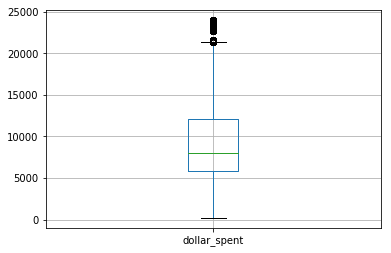

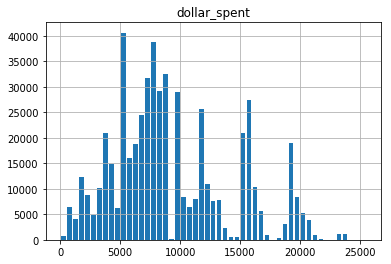

In [12]:
bf.boxplot()
bf.hist(bins=[x for x in range(0, 26000, 500)], rwidth=0.8)

### 3.3 Deskripsi Statistik Data

In [13]:
print('Minimum value      :',bf.min()['dollar_spent'])
print('Maximum value      :',bf.max()['dollar_spent'])
print('Mean value         :',bf.mean()['dollar_spent'])
print('Mode value         :',bf.mode()['dollar_spent'][0])
print('Median value       :',bf.median()['dollar_spent'])

Minimum value      : 185
Maximum value      : 23961
Mean value         : 9333.859852635065
Mode value         : 6855
Median value       : 8062.0


In [14]:
print('Variance           :',bf.var()['dollar_spent'])
print('Standard deviation :',bf.std()['dollar_spent'])
print('Skewness           :',bf.skew()['dollar_spent'])
print('Kurtosis           :',bf.kurt()['dollar_spent'])

Variance           : 24810581.48601374
Standard deviation : 4981.022132656483
Skewness           : 0.6242797316083074
Kurtosis           : -0.34312137256836284


### 3.4 Menentukan Fungsi Densitas Probabilitas

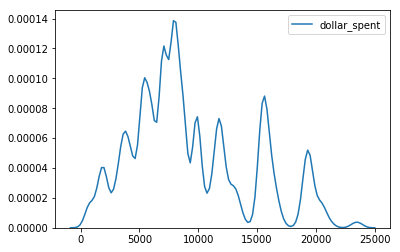

In [15]:
sns.kdeplot(bf['dollar_spent'])

In [16]:
# Nilai minimum dari dataset
minimum_x = bf.min()['dollar_spent']
print('Nilai minimum dollar_spent\t:', minimum_x)

# Nilai maksimum dari dataset
maximum_x = bf.max()['dollar_spent']
print('Nilai maksimum dollar_spent\t:', maximum_x)

Nilai minimum dollar_spent	: 185
Nilai maksimum dollar_spent	: 23961


Karena data yang digunakan adalah diskrit, lalu memerhatikan bahwa nilai terkecil untuk *dollar_spent* adalah 185, maka dapat langsung disimpulkan bahwa fungsi densitas probabilitas kumulatif yang digunakan adalah
\begin{equation*}
F(x) = P(X \leq x)   = \sum_{k=185}^x P(X = k)
\end{equation*}
Di mana F(x) adalah fungsi densitas probabilitas kumulatif, yaitu jumlah dari seluruh fungsi probabilitas densitas untuk X lebih kecil atau sama dengan dari x, sedangkan P(X = k) adalah fungsi probabilitas densitas untuk X bernilai k yang didefinisikan sebagai
\begin{equation*}
P(X = k)   = \frac{n_{X=k}}{n_{total}}
\end{equation*}

In [17]:
n_total = bf['dollar_spent'].count()

# Implementasi fungsi PDF/CDF secara harafiah
def pdf(k):
    n_x_equals_k = bf.loc[bf['dollar_spent'] == k]['dollar_spent'].count()
    return float(n_x_equals_k / n_total)

def cdf(x):
    res = float(0)
    for i in range(minimum_x, x+1, 1):
        res += pdf(i)
    return res

# Implementasi fungsi PDF yang lebih mangkus
def cdf_improved(k):
    n_x_less_than_or_equals_k = bf.loc[bf['dollar_spent'] <= k]['dollar_spent'].count()
    return float(n_x_less_than_or_equals_k / n_total)

### 3.5 Pertanyaan

1. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang:
    1. Miskin (total pembelian kurang dari 1000 dolar)
    2. Kaya (total pembelian lebih dari 10000 dolar)
    3. Crazy Rich (total pembelian lebih dari 20000 dolar)
    
2. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli:
    1. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)
    2. MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif)

### 3.6 Jawaban

#### 1.

In [18]:
pembeli_baru = 250

# a. Ekspektasi jumlah pembeli miskin dari 250 pembeli baru yaitu membeli kurang dari 1000 dollar
pembeli_miskin = int(pembeli_baru * cdf_improved(1000-1))
print('a. Ekspektasi jumlah pembeli miskin dari 250 pembeli baru\t:', pembeli_miskin)

# b. Ekspektasi jumlah pembeli kaya dari 250 pembeli baru yaitu membeli lebih dari 10000 dollar
pembeli_kaya = int(pembeli_baru * (1 - cdf_improved(10000)))
print('b. Ekspektasi jumlah pembeli kaya dari 250 pembeli baru\t\t:', pembeli_kaya)

# c. Ekspektasi jumlah pembeli miskin dari 250 pembeli baru yaitu membeli lebih dari 20000 dollar
pembeli_crazy_rich = int(pembeli_baru * (1 - cdf_improved(20000)))
print('c. Ekspektasi jumlah pembeli crazy rich dari 250 pembeli baru\t:', pembeli_crazy_rich)

a. Ekspektasi jumlah pembeli miskin dari 250 pembeli baru	: 3
b. Ekspektasi jumlah pembeli kaya dari 250 pembeli baru		: 86
c. Ekspektasi jumlah pembeli crazy rich dari 250 pembeli baru	: 5


####  2.

In [19]:
pembeli_baru = 1000

# a. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli galaxy fold
pembeli_galaxy_fold = int(pembeli_baru * (cdf_improved(2000) - cdf_improved(1980-1)))
print('a. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli galaxy fold\t:', pembeli_galaxy_fold)

# b. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli macbook pro
pembeli_macbook_pro = int(pembeli_baru * (cdf_improved(2897) - cdf_improved(2707-1)))
print('b. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli macbook pro\t:', pembeli_macbook_pro)

a. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli galaxy fold	: 1
b. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli macbook pro	: 7


## 4. Dataset 4 : Cryptocurrency

### 4.1 Baca Berkas

In [20]:
cc = pd.read_csv('crypto.csv', names=['price'])
cc.head()

price
0  0.000015
1  0.000023
2  0.000033
3  0.000037
4  0.000037

### 4.2 Visualisasi Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B11B98828>]],
      dtype=object)

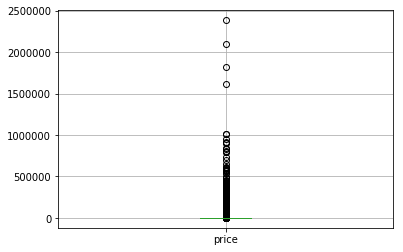

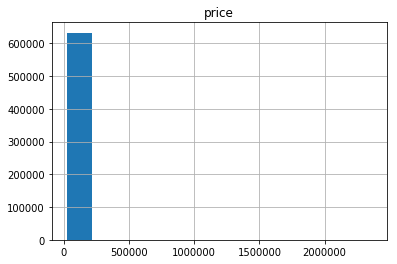

In [21]:
cc.boxplot()
cc.hist(rwidth=0.8)

### 4.3 Deskripsi Statistik Data

In [22]:
print('Minimum value      :',cc.min()['price'])
print('Maximum value      :',cc.max()['price'])
print('Mean value         :',cc.mean()['price'])
print('Mode value         :',cc.mode()['price'][0])
print('Median value       :',cc.median()['price'])

Minimum value      : 2.9249999999999997e-09
Maximum value      : 2383502.5
Mean value         : 203.01814563577602
Mode value         : 2e-06
Median value       : 0.0097335


In [23]:
print('Variance           :',cc.var()['price'])
print('Standard deviation :',cc.std()['price'])
print('Skewness           :',cc.skew()['price'])
print('Kurtosis           :',cc.kurt()['price'])

Variance           : 75320415.21220845
Standard deviation : 8678.733502776107
Skewness           : 118.23960755632972
Kurtosis           : 22297.470842872517


### 4.4 Menentukan Fungsi Densitas Probabilitas

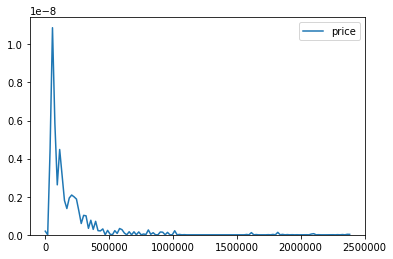

In [24]:
sns.kdeplot(cc['price'])

Melihat pada grafik di atas, dapat dihipotesiskan bahwa fungsi densitas probabilitas (PDF) yang digunakan adalah fungsi gamma. Hal ini disebabkan karena skewness dan kurtosis yang besar, yaitu skew ke arah kiri dengan frekuensi yang sangat tinggi. Selanjutnya, hipotesis akan dibantu dengan plot fungsi gamma yang dilakukan *fitting* terhadap grafik.

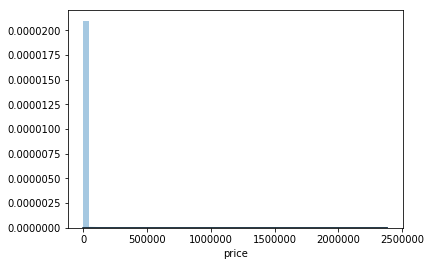

In [25]:
sns.distplot(cc['price'], fit=stats.gamma)

In [26]:
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(cc)
print(fit_alpha, fit_loc, fit_beta)

def pdf_crpyto(x):
    return stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=1/fit_beta)

def cdf_crypto(x):
    return stats.gamma.cdf(x, a=fit_alpha, loc=fit_loc, scale=1/fit_beta)

1.0350357867723378e-05 -1.4349907501575509e-05 2.9817719729930694


### 4.5 Pertanyaan
1. Apabila hari ini terdapat 1000 data harga cryptocurrency baru, tentukan ekspektasi jumlah cryptocurrency yang nilainya
    1. kurang dari 0.177013
    2. lebih dari 177.013
2. Jika suatu hari terdapat sebuah cryptocurrency baru, tentukan peluang cryptocurrency tersebut bernilai
    1. lebih dari 0.013
    2. kurang dari 17.7

###  4.6 Jawaban

In [27]:
# 1
print("a.",cdf_crypto(0.177013)*1000)
print("b.",(1-cdf_crypto(0.177013))*1000)

a. 999.9945418014477
b. 0.005458198552354965


In [28]:
# 2
print("a",1-cdf_crypto(0.013))
print("b",cdf_crypto(17.7))

a 2.8053319711229818e-05
b 1.0


## 5. Dataset 6 : Dutch Emission

### 5.1 Baca Berkas

In [29]:
emission = pd.read_csv("greenhouse-gas-emissions-in-the-netherlands/emission.csv", delimiter=';')

In [30]:
emission.head()

ID    Bronnen  Perioden   CO2_1    CH4_2  N2O_3
0   0  T001176    1990JJ00  163120  1278.17  59.49
1   1  T001176    1995JJ00  173520  1192.41  59.84
2   2  T001176    2000JJ00  172290   975.64  53.01
3   3  T001176    2001JJ00  177390   949.16  49.71
4   4  T001176    2002JJ00  176670   904.27  47.01

Karena ditemui bahwa bahasa yang digunakan adalah dalam penamaan tabel adalah dari bahasa belanda, maka akan kita ubah terlebih dahulu menjadi bahasa Inggris untuk memudahkan pengerjaan nantinya.

In [31]:
emission = emission.rename(columns={'Bronnen' : 'Sources', 'Perioden' : 'Periods'})
# src : https://translate.google.com/#view=home&op=translate&sl=nl&tl=en&text=Perioden%0ABronnen

# Cek ulang, untuk melihat perubahan
emission.head()

ID    Sources   Periods   CO2_1    CH4_2  N2O_3
0   0  T001176    1990JJ00  163120  1278.17  59.49
1   1  T001176    1995JJ00  173520  1192.41  59.84
2   2  T001176    2000JJ00  172290   975.64  53.01
3   3  T001176    2001JJ00  177390   949.16  49.71
4   4  T001176    2002JJ00  176670   904.27  47.01

### 5.2 Visualisasi Data

Dalam dataset ini, ada beberapa hal yang bisa disajikan, yaitu

#### 5.2.1. CO2

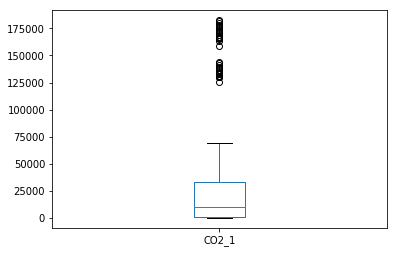

In [32]:
emission['CO2_1'].plot.box()

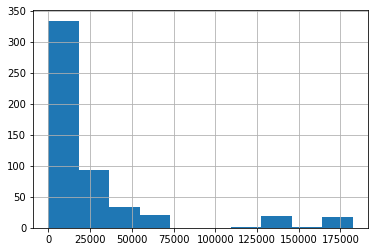

In [33]:
emission['CO2_1'].hist()

#### 5.2.2 CH4

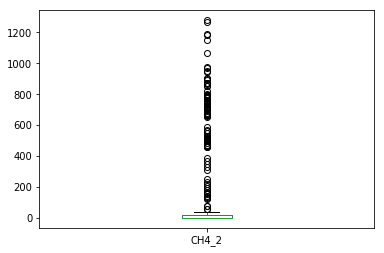

In [34]:
emission['CH4_2'].plot.box()

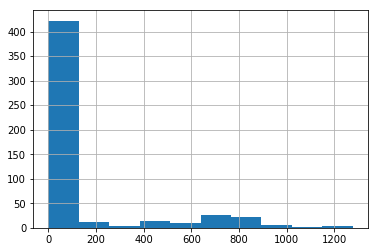

In [35]:
emission['CH4_2'].hist()

#### 5.2.3 N2O

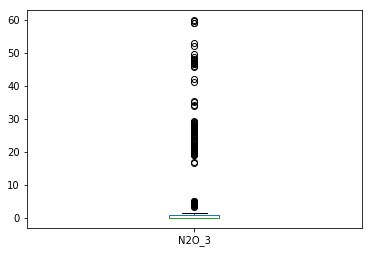

In [36]:
emission['N2O_3'].plot.box()

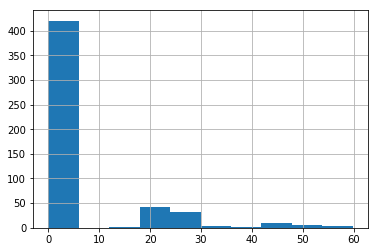

In [37]:
emission['N2O_3'].hist()

### 5.3 Deskripsi Statistik Data

Dalam dataset ini, ada beberapa hal yang bisa disajikan, yaitu
#### 5.3.1. CO2

In [38]:
print("=== CO2 ===")
print("Minimum Value      :", emission['CO2_1'].min())
print("Maximum Value      :", emission['CO2_1'].max())
print("Mean               :", emission['CO2_1'].mean())
print("Mode               :", emission['CO2_1'].mode()[0])
print("Variance           :", emission['CO2_1'].var())
print("Standard Deviation :", emission['CO2_1'].std())
print("Skewness           :", emission['CO2_1'].skew())
print("Kurtosis           :", emission['CO2_1'].kurt())

=== CO2 ===
Minimum Value      : 30
Maximum Value      : 182440
Mean               : 25673.01923076923
Mode               : 40
Variance           : 1664567682.7741928
Standard Deviation : 40799.113749862176
Skewness           : 2.47848175690753
Kurtosis           : 5.59745217324895


#### 5.3.2. CH4

In [39]:
print("=== CH4 ===")
print("Minimum Value      :", emission['CH4_2'].min())
print("Maximum Value      :", emission['CH4_2'].max())
print("Mean               :", emission['CH4_2'].mean())
print("Mode               :", emission['CH4_2'].mode()[0])
print("Variance           :", emission['CH4_2'].var())
print("Standard Deviation :", emission['CH4_2'].std())
print("Skewness           :", emission['CH4_2'].skew())
print("Kurtosis           :", emission['CH4_2'].kurt())

=== CH4 ===
Minimum Value      : 0.0
Maximum Value      : 1278.17
Mean               : 129.6030384615383
Mode               : 0.0
Variance           : 76324.8307980716
Standard Deviation : 276.2694894447659
Skewness           : 2.1214621623998107
Kurtosis           : 3.2850095587948065


#### 5.3.3. N2O

In [40]:
print("=== N2O ===")
print("Minimum Value      :", emission['N2O_3'].min())
print("Maximum Value      :", emission['N2O_3'].max())
print("Mean               :", emission['N2O_3'].mean())
print("Mode               :", emission['N2O_3'].mode()[0])
print("Variance           :", emission['N2O_3'].var())
print("Standard Deviation :", emission['N2O_3'].std())
print("Skewness           :", emission['N2O_3'].skew())
print("Kurtosis           :", emission['N2O_3'].kurt())

=== N2O ===
Minimum Value      : 0.0
Maximum Value      : 59.84
Mean               : 5.987807692307731
Mode               : 0.03
Variance           : 153.342715030384
Standard Deviation : 12.383162561736158
Skewness           : 2.261290161593164
Kurtosis           : 4.607188144519335


### 5.4 Menentukan Fungsi Densitas Probabilitas

Dengan melihat bentuk dari histogram pada subbab 5.2, kami akan mencoba mencocokan plot distribusi dari ke-3 nya dengan distribusi Gamma.

#### 5.4.1 CO2

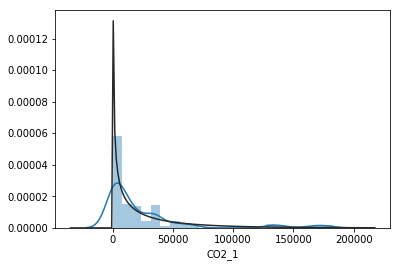

In [41]:
from scipy.stats import gamma

sns.distplot(emission['CO2_1'], fit=gamma)

In [42]:
fit_alpha_1, fit_loc_1, fit_beta_1 = stats.gamma.fit(emission['CO2_1'])
print(fit_alpha_1, fit_loc_1, fit_beta_1)

0.4213755206282642 29.999999999999993 56021.05340184657


#### 5.4.2 CH4

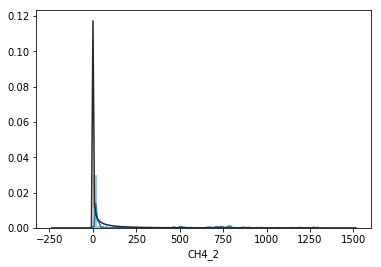

In [43]:
sns.distplot(emission['CH4_2'], fit=gamma)

In [44]:
fit_alpha_2, fit_loc_2, fit_beta_2 = stats.gamma.fit(emission['CH4_2'])
print(fit_alpha_2, fit_loc_2, fit_beta_2)

0.2392825121546917 -3.687852372853167e-26 217.84253714690806


#### 5.4.3 N2O

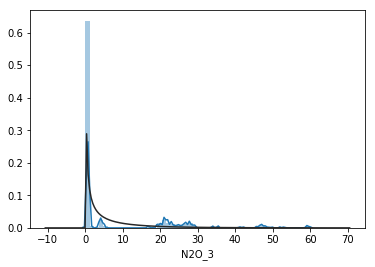

In [45]:
sns.distplot(emission['N2O_3'],fit=gamma)

In [46]:
fit_alpha_3, fit_loc_3, fit_beta_3 = stats.gamma.fit(emission['N2O_3'])
print(fit_alpha_3, fit_loc_3, fit_beta_3)

0.27342661232631216 -1.4469759299031242e-28 15.314330039077348


### 5.5 Pertanyaan

Nyonya Meneer adalah seorang Environmentalist dari Belanda. Beliau sedang menyelidiki bagaimana efek dari emisi gas rumah kaca karbon dioksida, metana dan dinitrogen oksida di negara Belanda. Beliau adalah seseorang tidak suka dengan pemanasan global yang melanda dunia ini. Tentu beliau tidak ingin belanda tenggelam, karena sudah dibawah permukaan laut, lalu ditambah dengan pencairan es kutub utara. Beliau menyelidiki ini setiap tahun dengan 20 sektor. Tentu beliau ingin menentukan pola emisi gas rumah kaca tersebut dan memprediksinya. Maka, beliau harus menentukan ini terlebih dahulu.
1. Dalam 10 tahun, untuk menyelamatkan bumi dari pemanasan global membutuhkan total emisi dari karbon dioksida, metana dan dinitrogen oksida tidak lebih dari 12000, 600, 25. Sebutkan ekspektasi total (untuk sektor T001176) emisi dari karbon dioksida, metana dan dinitrogen oksida menyebabkan pemanasan global!

2. Dalam 6 tahun:
    1. Ekspektasi emisi dari sektor ekstraksi minyak bumi (sektor 305800) untuk rata-rata semua emisi gas tidak lebih dari 1500
    2. Ekspektasi emisi dari sektor perusahaan energi (sektor 346700) untuk rata-rata semua emisi gas tidak lebih dari 35000
    
3. *Confidence Interval 90%*

### 5.6 Jawaban

In [47]:
# Simplifikasi data dengan mengelompokkan data berdasar sectornya
emission_by_sector = emission.groupby(['Sources']).sum().reset_index()
emission_by_sector

Sources     ID    CO2_1     CH4_2   N2O_3
0   1050010     4590   396230    401.32    6.01
1   301100      5390   152770  10160.16  473.59
2   305800      1390    35990    410.26    0.32
3   320300      1790   226730     19.65    0.71
4   320705      2990   350300    356.59  248.85
5   328100      3390   137830      6.85    0.56
6   346700      2190   992220    381.31    8.98
7   350000      4190    14570      1.42    0.00
8   800044       990  1254960    811.27   10.00
9   800045      2590   682170    396.89  250.31
10  800051      4990   366370  15266.72  495.25
11  A025421     6190   736810     72.54   18.34
12  A025422     6590   651900     65.71   16.94
13  A025423     6990     1960      0.17    0.00
14  A025424     7390   629590     63.00   16.38
15  A025425     7790    19400      2.58    0.51
16  A025428     8190      900      0.00    0.00
17  A025429     8590    84940      6.85    1.40
18  A025430     8990    22130      1.27    0.20
19  A025431     9390    16200      1.51    0.45
20  A025432     9790     4060      0.40    0.24
21  A025433    10190    42530      3.63    0.54
22  A025441     3790   179500     32.02    0.94
23  A025446     5790   213610   5106.58   21.65
24  A025447      590  2699740  16876.18  761.59
25  T001176      190  3436560  16948.70  779.90

In [48]:
## Hitung total Karbon Dioksida
CO2_total = emission_by_sector['CO2_1'].sum()
print("Total CO2 \t\t\t=", CO2_total)

## Hitung jumlah Karbon Dioksida pada Sector T001176
CO2_in_sector_1176 = emission_by_sector['CO2_1'].loc[25]
print("Total CO2 in sector T001176 \t=", CO2_in_sector_1176)

## Hitung peluang Karbon Dioksida
CO2_prob = CO2_in_sector_1176/CO2_total
print("Probability of CO2 \t\t=",CO2_prob,'\n')

## Hitung total Metana
CH4_total = emission_by_sector['CH4_2'].sum()
print("Total CH4 \t\t\t=", CH4_total)

## Hitung jumlah Metana pada Sector T001176
CH4_in_sector_1176 = emission_by_sector['CH4_2'].loc[25]
print("Total CH2 in sector T001176 \t=", CH4_in_sector_1176)

## Hitung peluang Metana
CH4_prob = CH4_in_sector_1176/CH4_total
print("Probability of CH4 \t\t=",CH4_prob,'\n')

## Hitung total Dinitrogen Oksida
N2O_total = emission_by_sector['N2O_3'].sum()
print("Total NO2 \t\t\t=", N2O_total)

## Hitung jumlah Dinitrogen Oksida pada Sector T001176
N2O_in_sector_1176 = emission_by_sector['N2O_3'].loc[25]
print("Total N2O in sector T001176 \t=", N2O_in_sector_1176)

## Hitung peluang Dinitrogen Oksida
N2O_prob = N2O_in_sector_1176/N2O_total
print("Probability of N2O \t\t=",N2O_prob,'\n')

Total CO2 			= 13349970
Total CO2 in sector T001176 	= 3436560
Probability of CO2 		= 0.2574208031928162 

Total CH4 			= 67393.58
Total CH2 in sector T001176 	= 16948.7
Probability of CH4 		= 0.2514883465160925 

Total NO2 			= 3113.66
Total N2O in sector T001176 	= 779.8999999999997
Probability of N2O 		= 0.2504769306860736 



In [49]:
## Cari Alpha dan Beta dari masing masing

beta_CO2 = emission['CO2_1'].var()/emission['CO2_1'].mean()
# alpha_CO2 = emission['CO2_1'].mean()/beta_CO2
# print("Alpha CO2 =", alpha_CO2)
print("Beta CO2  =", beta_CO2)
print()

beta_CH4 = emission['CH4_2'].var()/emission['CH4_2'].mean()
alpha_CH4 = emission['CH4_2'].mean()/beta_CH4
print("Alpha CH4 =", alpha_CH4)
print("Beta CH4  =", beta_CH4)
print()

beta_N2O = emission['N2O_3'].var()/emission['N2O_3'].mean()
alpha_N2O = emission['N2O_3'].mean()/beta_N2O
print("Alpha N2O =", alpha_N2O)
print("Beta N2O  =", beta_N2O)
print()

Beta CO2  = 64837.238963277094

Alpha CH4 = 0.22007186131734416
Beta CH4  = 588.9123565627066

Alpha N2O = 0.23381509159372457
Beta N2O  = 25.60915829467545



## 6. Dataset 5 : Atlet Olimpiade

### 6.1 Baca Berkas

In [50]:
ao = pd.read_csv('athletes.csv', usecols=['Medal'])
ao.head()

Medal
0      0
1      0
2      0
3      0
4      0

### 6.2 Visualisasi Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B12BD33C8>]],
      dtype=object)

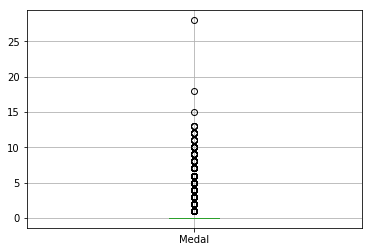

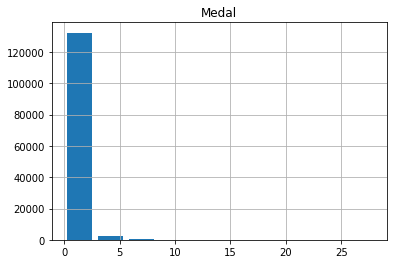

In [51]:
ao.boxplot()
ao.hist(rwidth=0.8)

### 6.3 Deskripsi Statistik Data

In [52]:
print('Minimum value      :',ao.min()['Medal'])
print('Maximum value      :',ao.max()['Medal'])
print('Mean value         :',ao.mean()['Medal'])
print('Mode value         :',ao.mode()['Medal'][0])
print('Median value       :',ao.median()['Medal'])

Minimum value      : 0
Maximum value      : 28
Mean value         : 0.2952772561622789
Mode value         : 0
Median value       : 0.0


In [53]:
print('Variance           :',ao.var()['Medal'])
print('Standard deviation :',ao.std()['Medal'])
print('Skewness           :',ao.skew()['Medal'])
print('Kurtosis           :',ao.kurt()['Medal'])

Variance           : 0.5252132778008305
Standard deviation : 0.724715998030146
Skewness           : 4.8199987845312
Kurtosis           : 51.562525836059855


### 6.4 Menentukan Fungsi Densitas Probabilitas

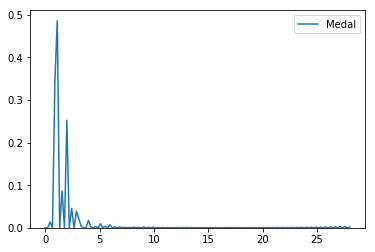

In [54]:
sns.kdeplot(ao['Medal'])

In [55]:
# Nilai minimum dari dataset
minimum_x = ao.min()['Medal']
print('Nilai minimum Medal\t:', minimum_x)

# Nilai maksimum dari dataset
maximum_x = ao.max()['Medal']
print('Nilai maksimum Medal\t:', maximum_x)

Nilai minimum Medal	: 0
Nilai maksimum Medal	: 28


Karena data yang digunakan adalah diskrit, lalu memerhatikan bahwa nilai terkecil untuk *Medal* adalah 0, maka dapat langsung disimpulkan bahwa fungsi densitas probabilitas kumulatif yang digunakan adalah
\begin{equation*}
F(x) = P(X \leq x)   = \sum_{k=0}^x P(X = k)
\end{equation*}
Di mana F(x) adalah fungsi densitas probabilitas kumulatif, yaitu jumlah dari seluruh fungsi probabilitas densitas untuk X lebih kecil atau sama dengan dari x, sedangkan P(X = k) adalah fungsi probabilitas densitas untuk X bernilai k yang didefinisikan sebagai
\begin{equation*}
P(X = k)   = \frac{n_{X=k}}{n_{total}}
\end{equation*}

In [56]:
n_total = ao['Medal'].count()

# Implementasi fungsi PDF/CDF secara harafiah
def pdf(k):
    n_x_equals_k = ao.loc[ao['Medal'] == k]['Medal'].count()
    return float(n_x_equals_k / n_total)

def cdf(x):
    res = float(0)
    for i in range(minimum_x, x+1, 1):
        res += pdf(i)
    return res

# Implementasi fungsi PDF yang lebih mangkus
def cdf_improved(k):
    n_x_less_than_or_equals_k = ao.loc[ao['Medal'] <= k]['Medal'].count()
    return float(n_x_less_than_or_equals_k / n_total)

### 6.5 Pertanyaan

Tuan X adalah seorang mantan atlet tua dan miskin yang melewati kesempatannya meraih kejayaan dalam Olimpiade. Dia memiliki seorang anak, Y, yang dia hendak didik dari bayi untuk menjadi atlet Olimpiade kelas dunia, apapun caranya. Dia telah meminta Anda, seorang statistikawan, untuk menganalisis peluang bocah ingusan tersebut mendapat setidaknya satu medali apapun (emas, perak, perunggu, yang penting dijual dapat uang banyak). Anda memiliki data nama-nama semua atlet yang pernah mengikuti Olimpiade, dari tahun 1800-an hingga 2018, serta jumlah medali apapun yang pernah ia raih seumur hidupnya. Demi kesohoran anak malang tersebut, Anda harus menentukan jawaban persoalan berikut:
1. Peluang Y meraih
    1. tepat 0 medali
    2. lebih dari 10 medali
    3. tepat 3 medali
    4. 1 atau 5 medali
2. Rata-rata medali dengan confidence interval 95%

### 6.6 Jawaban

#### 1.

In [57]:
pembeli_baru = 250

print('a. Peluang meraih 0 medali\t\t:', pdf(0))
print('b. Peluang meraih > 10 medali\t\t:', 1 - cdf(10))
print('c. Peluang meraih tepat 3 medali\t:', pdf(3))
print('c. Peluang meraih 1 atau 5 medali\t:', pdf(1) + pdf(5))

a. Peluang meraih 0 medali		: 0.7906792052311643
b. Peluang meraih > 10 medali		: 0.00015586613325813126
c. Peluang meraih tepat 3 medali	: 0.01027974259821422
c. Peluang meraih 1 atau 5 medali	: 0.1588424341836697


####  2.

In [58]:
print('Rata-rata perolehan medali\t:', ao.mean()['Medal'])

Rata-rata perolehan medali	: 0.2952772561622789
